### Very Basic Extraction of Possibly Relevant Quotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
politicians = pd.read_csv("data/politicians.csv")

In [3]:
names = politicians.speaker

In [4]:
words = ['lesbian', 'gay', 'homosexual', 'gender', 'bisexual', 'sexuality', 'same sex'] # obviously add more

In [5]:
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
690,Texas,Van Taylor
691,Texas,Veronica Escobar
692,Florida,W. Gregory Steube
693,South Carolina,William R. Timmons IV


In [5]:
# only take rows with speakers in the congress or senator files
# only take rows with quotations that contain relevant words
chunk_num = 1
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        
        return chunk.loc[chunk.speaker.isin(names) & (chunk.quotation.str.contains('{}'.format("|".join(words))))]
            
        

with pd.read_json('data/quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=100000) as df_reader:
    for chunk in df_reader:
        processed_chunk = process_chunk(chunk)
        if (chunk_num == 1):
            dataframe15 = processed_chunk
            chunk_num += 1
        else:
            dataframe15 = pd.concat([dataframe15, processed_chunk])
        



KeyboardInterrupt: 

In [6]:
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner').drop(columns=['state_y', 'Unnamed: 0'])
merged.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
378,2015-05-28-010734,dumb attempt at dark satire in an alternative ...,Bernie Sanders,['Q359442'],2015-05-28 20:54:52,2,"[['Bernie Sanders', '0.5039'], ['None', '0.451...",['http://www.mediaite.com/online/bernie-sander...,E,Vermont
825,2015-02-11-014356,Discrimination based on sexual orientation or ...,Jeanne Shaheen,['Q270316'],2015-02-11 17:01:24,2,"[['Jeanne Shaheen', '0.6823'], ['Susan Collins...",['http://wlbz2.com/story/news/local/2015/02/11...,E,New Hampshire
796,2015-07-23-053588,I'm still thankful to be here. As we pause ton...,Brenda Jones,"['Q243086', 'Q58360045', 'Q58806791']",2015-07-23 17:31:21,1,"[['Brenda Jones', '0.8699'], ['None', '0.1301']]",['http://www.pridesource.com/article.html?arti...,E,Michigan
257,2015-04-09-112119,You used to be against gay marriage; now you'r...,Rand Paul,['Q463557'],2015-04-09 17:39:24,1,"[['Rand Paul', '0.462'], ['None', '0.2451'], [...",['http://www.rushlimbaugh.com/daily/2015/04/09...,E,Kentucky
472,2015-07-21-095578,There is a gender card being played in this ca...,Mitch McConnell,['Q355522'],2015-07-21 10:33:25,6,"[['Mitch McConnell', '0.5699'], ['None', '0.35...",['http://feeds.wired.com/c/35185/f/661370/s/48...,E,Kentucky
732,2015-05-13-064630,to stigmatize gay and bisexual men.,Patty Murray,['Q258825'],2015-05-13 14:02:05,1,"[['Patty Murray', '0.6211'], ['None', '0.3789']]",['http://www.politico.com/politicopulse/0515/p...,E,Washington
463,2015-04-13-047762,Most Americans would be surprised to learn tha...,Steve Israel,"['Q2096271', 'Q7612913']",2015-04-13 03:12:15,2,"[['Steve Israel', '0.3362'], ['None', '0.2867'...",['http://rssfeeds.usatoday.com/~/89024929/0/us...,E,New York
58,2015-06-21-033744,The modern Democratic Party has decided their ...,Ted Cruz,['Q2036942'],2015-06-21 05:43:57,1,"[['Ted Cruz', '0.6641'], ['None', '0.3359']]",['http://nationaljournal.com/2016-elections/te...,E,Texas
761,2015-07-30-094660,The Democratic Party continues to focus on cre...,Debbie Wasserman Schultz,['Q50104'],2015-07-30 05:00:00,2,"[['Debbie Wasserman Schultz', '0.9062'], ['Non...",['http://rollcall.com/news/democrats_look_to_p...,E,Florida
385,2015-11-08-058085,These guys on Wall Street have more wealth and...,Bernie Sanders,['Q359442'],2015-11-08 21:00:00,1,"[['Bernie Sanders', '0.8097'], ['None', '0.190...",['http://lasvegassun.com/news/2015/nov/08/sand...,E,Vermont


In [7]:
merged.shape

(844, 10)

In [8]:
merged.quotation.sample(10)

139    On the Democratic side, the major donors that ...
6      The FDA's new policy continues the government'...
700    Sen. Joni Ernst turned one of Hillary Clinton'...
229    However, the Supreme Court has ruled that stat...
768    swift enactment of the necessary legislation s...
464    Putting in place federal protection for LGBT A...
843    I've served alongside a number of gay and lesb...
84     This week was a very bad week for gay rights b...
543    He wears stylish clothing and yet he is not ga...
353        I'm not evolving when it comes to gay rights,
Name: quotation, dtype: object

Visualisation by states

In [9]:
merged.state_x.value_counts()

Texas                   198
Vermont                 158
Florida                  91
California               62
Kentucky                 51
Illinois                 31
South Carolina           24
New York                 17
Colorado                 14
Wisconsin                13
Iowa                     12
Washington               12
Georgia                  11
Arizona                  11
New Jersey               11
Ohio                     11
Hawaii                   10
Kansas                    9
Utah                      8
Arkansas                  8
Maine                     8
Virginia                  7
Oregon                    6
Louisiana                 6
Massachusetts             5
Tennessee                 5
Oklahoma                  5
Alaska                    5
Maryland                  4
Nevada                    4
Nebraska                  3
Connecticut               3
Minnesota                 3
Pennsylvania              3
Michigan                  3
District of Columbia

In [20]:
#get the number of occurences of all the quotations for a state
grouped_by_state = merged.groupby('state_x').agg({'numOccurrences' : sum})#sum()

#Add a column with the number of different quotations for a state
grouped_by_state['numQuotations']= merged.state_x.value_counts()
grouped_by_state.sort_values(by = 'numOccurrences', ascending=False)

,numOccurrences,numQuotations
state_x,,
Massachusetts,1185,109
Vermont,296,60
Illinois,90,21
California,31,23
Colorado,15,10
Florida,14,8
Missouri,13,5
New York,11,6
Minnesota,7,3


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

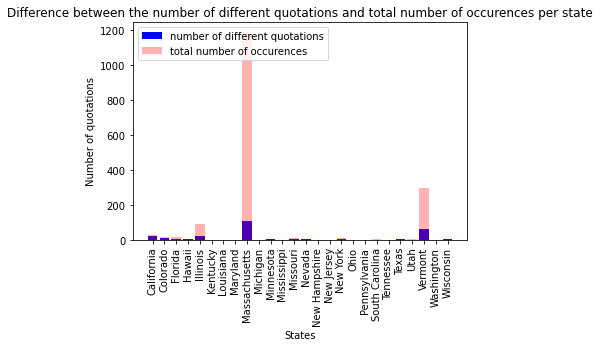

In [21]:
plt.bar(grouped_by_state.index, grouped_by_state.numQuotations, color='blue', label = "number of different quotations" )
plt.bar(grouped_by_state.index, grouped_by_state.numOccurrences, alpha=0.3, color='red', label="total number of occurences")
plt.legend(loc='upper left')
plt.xlabel('States')
plt.ylabel('Number of quotations')
plt.title('Difference between the number of different quotations and total number of occurences per state')
plt.xticks(rotation=90)

plt.plot

This graph which represents differences between the number of different quotations and total number of occurences per state allows us to deduce if the topic of LGBT community is in the spotlights in specific states. 

Indeed, we can directly see in which sates there are a larger number of quotations and how many times there are quoted. For example, we can observe that in the state of vermont, the subject is widely spoken whereas in New Mexico there is only one quotation about the topic.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

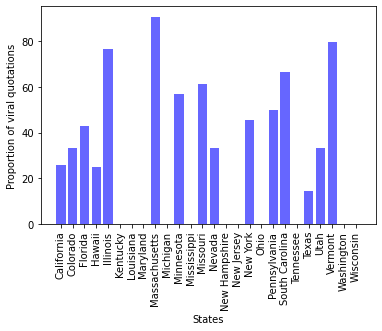

In [23]:
grouped_by_state['proportional_numQuotations'] = (grouped_by_state.numQuotations/grouped_by_state.numOccurrences)*100

plt.bar(grouped_by_state.index, 100-grouped_by_state.proportional_numQuotations, color='blue', alpha=0.6, label = "number of different quotations" )
plt.xlabel('States')
plt.ylabel('Proportion of viral quotations')
plt.xticks(rotation=90)
plt.plot

In [10]:
#read hate_crime_2015:
hate_crime=pd.read_csv("data/hatecrime2015.csv")
hate_crime
hate_crime.sort_index()


,State,Agency Type,Agency name,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nIdentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Population1
0,Alabama,Total,NaN,8.0,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,Cities,NaN,8.0,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Birmingham,3.0,0,2.0,0.0,0.0,0.0,1.0,1.0,1,2.0,"212,291"
3,NaN,NaN,Hoover,4.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,0.0,"85,163"
4,NaN,NaN,Prattville,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,"35,637"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,3 Includes one incident reported with more tha...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NAOMIE: (avant c elsa)

In [11]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#clean it:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum()
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
11,GEORGIA,"10,519,475","425,000",4.500%,27.00%,19.600%
53,WEST VIRGINIA,"1,805,832","68,000",4.00%,31.00%,17.800%
1,ALASKA,"737,438","25,000",3.700%,34.00%,23.100%
16,INDIANA,"6,691,878","272,000",4.500%,34.00%,18.900%
55,WYOMING,"577,737","18,000",3.300%,28.00%,24.700%
27,MISSOURI,"6,126,452","217,000",3.800%,26.00%,17.300%
45,SOUTH DAKOTA,"882,235","25,000",3.00%,29.00%,21.100%
44,SOUTH CAROLINA,"5,084,127","167,000",3.500%,30.0%,18.900%
25,MINNESOTA,"5,611,179","210,000",4.100%,28.00%,16.500%
0,ALABAMA,"4,887,871","147,000",3.100%,24.00%,20.400%


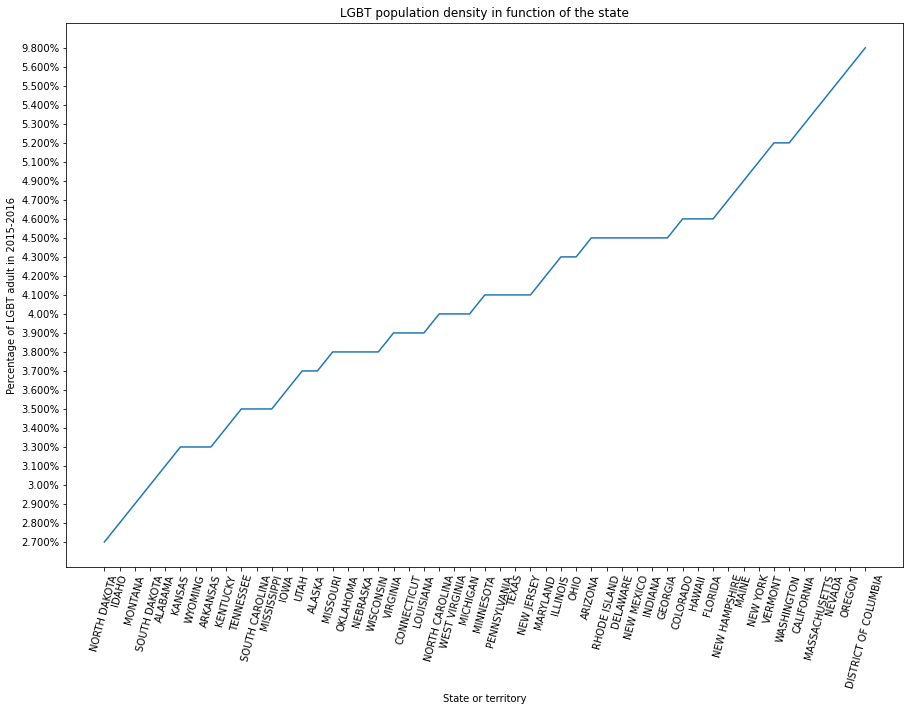

In [12]:
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(15,10))
plt.plot(lgbtpopulation['STATE'], lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

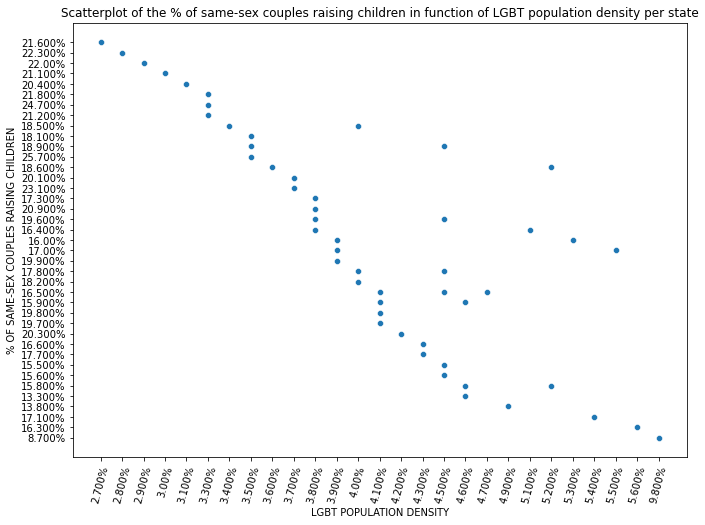

In [13]:
#Correlation between LGBT population density and % OF SAME-SEX COUPLES RAISING CHILDREN??
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

We will discuss it later, here we are just doing some pre-processing steps and visualizations but it seems that we have a correlation between these two categories.

In [14]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": "Percentage of LGBT adult in 2015-2016", "2016 transgender adult percentage estimate[2]": "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) 


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


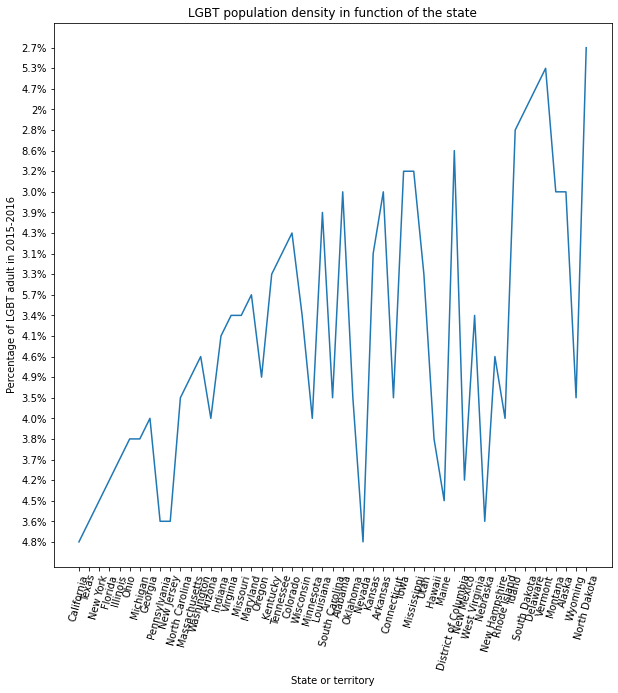

In [15]:
#visualizations:
plt.figure(figsize=(10,10))
plt.plot(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

#### can do the same for each year...

In [16]:
dataframe20=pd.read_csv("data/df20.csv")
merged = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged.drop(columns=['state_y', 'Unnamed: 0'])
merged20.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
88,2020-03-02-066752,transgender people of color are disproportiona...,Elizabeth Warren,['Q434706'],2020-03-02 19:30:53,1,"[['Elizabeth Warren', '0.8662'], ['None', '0.1...",['https://www.laweekly.com/time-for-tea-the-de...,E,Massachusetts
102,2020-02-21-053141,So I'd like to talk about who we're running ag...,Elizabeth Warren,['Q434706'],2020-02-21 05:26:44,4,"[['Elizabeth Warren', '0.8673'], ['None', '0.0...",['https://www.wnd.com/2020/02/debate-aftermath...,E,Massachusetts
7,2020-02-20-057983,running against a billionaire who calls women ...,Elizabeth Warren,['Q434706'],2020-02-20 02:36:09,1,"[['Elizabeth Warren', '0.919'], ['None', '0.07...",['https://kvia.com/your-voice-your-vote/politi...,E,Massachusetts
245,2020-01-29-075417,Researchers examined a representative sample o...,Tulsi Gabbard,['Q32620'],2020-01-29 20:58:00,1,"[['Tulsi Gabbard', '0.6604'], ['None', '0.3396']]",['http://feeds.towleroad.com/~r/towleroad/feed...,E,Hawaii
146,2020-01-18-013699,I could say a lot of bad things about Trump an...,Bernie Sanders,['Q359442'],2020-01-18 21:48:50,2,"[['Bernie Sanders', '0.7919'], ['None', '0.161...",['https://www.seacoastonline.com/news/20200118...,E,Vermont
112,2020-01-02-032650,It's about acknowledging there is an enormous ...,Sam Johnson,"['Q19799878', 'Q19876548', 'Q19879328', 'Q1988...",2020-01-02 11:13:50,1,"[['Sam Johnson', '0.7022'], ['None', '0.2978']]",['https://www.pcr-online.biz/2020/01/02/divers...,E,Texas
233,2020-02-12-057732,It's the same job as if he was a different gen...,Jared Polis,['Q935734'],2020-02-12 12:46:24,2,"[['Jared Polis', '0.6738'], ['None', '0.3051']...",['https://www.washingtonblade.com/2020/02/12/c...,E,Colorado
182,2020-03-06-022971,I hope that others can respect that for me bei...,Aaron Schock,"['Q24705735', 'Q302659']",2020-03-06 21:15:35,2,"[['Aaron Schock', '0.9136'], ['None', '0.0749'...",['http://abc7.com/former-gop-lawmaker-came-out...,E,Illinois
79,2020-02-20-010539,can call women fat broads and horse-face lesbi...,Elizabeth Warren,['Q434706'],2020-02-20 00:00:00,2,"[['Elizabeth Warren', '0.8829'], ['None', '0.1...",['http://feeds.foxnews.com/~r/foxnews/politics...,E,Massachusetts
41,2020-01-31-040729,I will create a new grant program within the O...,Elizabeth Warren,['Q434706'],2020-01-31 10:00:00,1,"[['Elizabeth Warren', '0.5165'], ['None', '0.4...",['http://www.out.com/commentary/2020/1/31/out-...,E,Massachusetts
